In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("apple_stock.csv")
data.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Adj Close  252 non-null    float64
 2   Close      252 non-null    float64
 3   High       252 non-null    float64
 4   Low        252 non-null    float64
 5   Open       252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


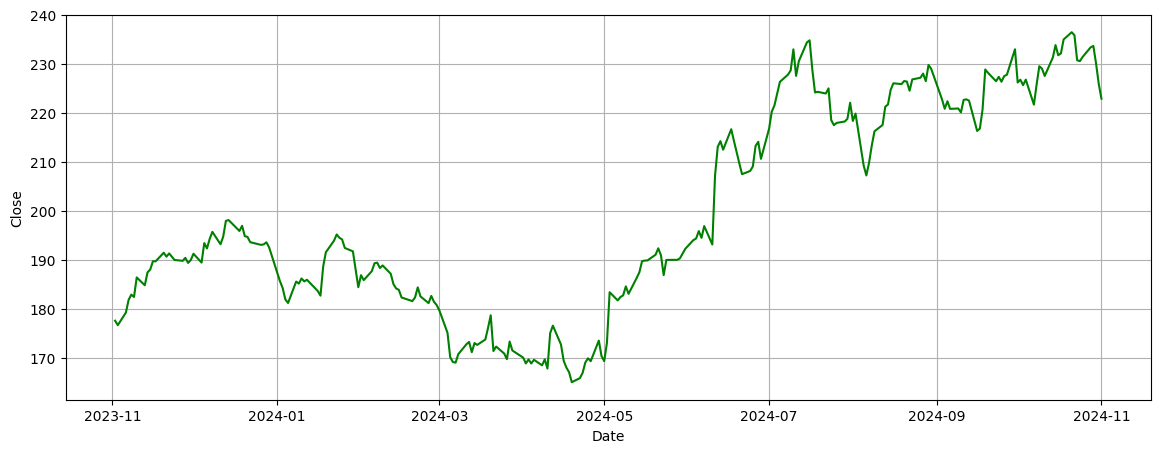

In [27]:
data["Date"]=pd.to_datetime(data["Date"])
plt.figure(figsize=(14,5))
sns.lineplot(x="Date",y="Close",data=data,color="green")
plt.grid(True)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [42]:
ss=StandardScaler()

In [43]:
data['Date'] = data['Date'].astype(np.int64)

In [44]:
x=data.drop(["Close"],axis=1)
y=data["Close"]
x=ss.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
def evaluate_models(x_train,x_test,y_tarin,y_test):
    models={
        "Linear Regression":LinearRegression(),
        "Random Forest Regression":RandomForestRegressor(),
        "Decision Tree Regressor":DecisionTreeRegressor(),
        "K-Nearest Neighbours":KNeighborsRegressor()
    }
    result={}
    for name ,model in models.items():
        model.fit(x_train,y_train)
        prediction=model.predict(x_test)
        r2=r2_score(y_test,prediction)
        result[name]={"R2_Score":r2*100}

    result_frame=pd.DataFrame(result).T

    return result_frame

In [64]:
result_frame=evaluate_models(x_train,x_test,y_train,y_test)
result_frame

,R2_Score
Linear Regression,99.998687
Random Forest Regression,99.927740
Decision Tree Regressor,99.817667
K-Nearest Neighbours,99.058046


/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_28996/2501776470.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="R2_Scores", data=df_results, palette='viridis')


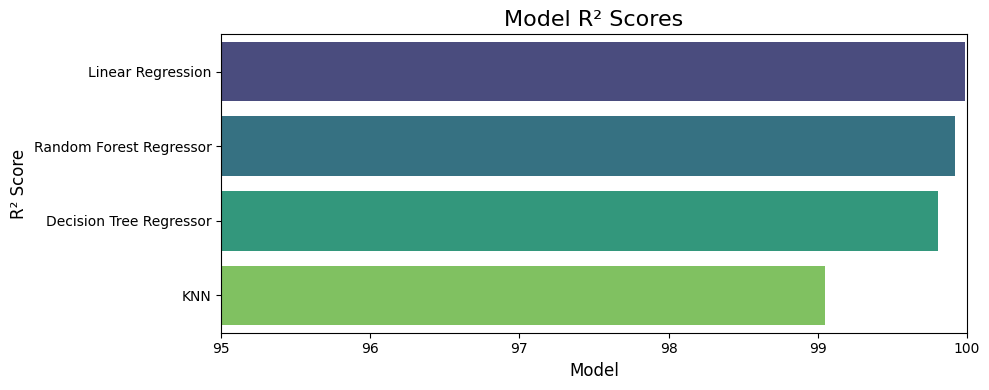

In [84]:
F_results = {
    "Model": ["Linear Regression", "Random Forest Regressor", "Decision Tree Regressor", "KNN"],
    "R2_Scores": [99.99, 99.92, 99.81, 99.05]
}

df_results = pd.DataFrame(F_results)
plt.figure(figsize=(10, 4))
sns.barplot(y="Model", x="R2_Scores", data=df_results, palette='viridis')
plt.title('Model R² Scores', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xlim(95,100)
plt.tight_layout()  
plt.show()
